# Iris Flower Classification

This notebook contains Python programming to create a machine learning model to predict the iris flower's species using attributes from the iris-flower dataset.

For that,We're going to approach in the following manner:
1. Problem definition
2. Data
3. Features
4. Modeling
5. Saving and loading trained machine learning models

## 1. Problem Definition

> Given attributes about an iris flower's species, can we predict which species they are?

## 2. Data

The original data available on Kaggle. https://www.kaggle.com/datasets/arshid/iris-flower-dataset

## 3. Features

**Create data dictionary**

1. sepal_length - length of the sepal
2. sepal_width - width of the sepal
3. petal_length - length of the petal
4. petal_width - width of the petal
5. species - which species they are
    * 1: Iris-setosa -Setosa
    * 2: Iris-versicolor -Versicolor
    * 3: Iris-virginica -Virginica 

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [2]:
df = pd.read_csv("IRIS.csv")
df.shape #(Rows,Columns)

(150, 5)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
#Let"s find out how many of each class there
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

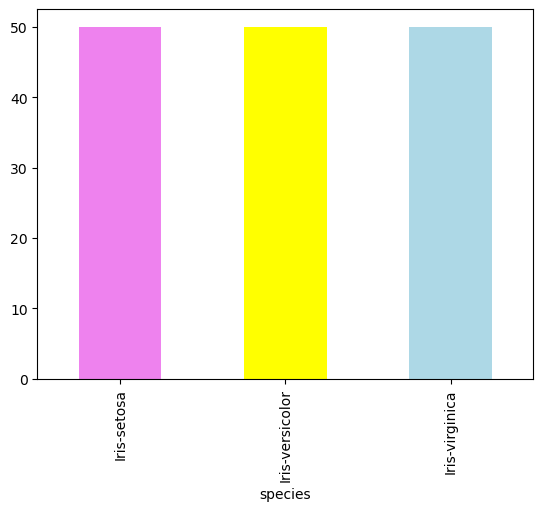

In [6]:
df["species"].value_counts().plot(kind= "bar",color= ["violet","yellow","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Are there any missing value?
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Species according to length and width of the sepal

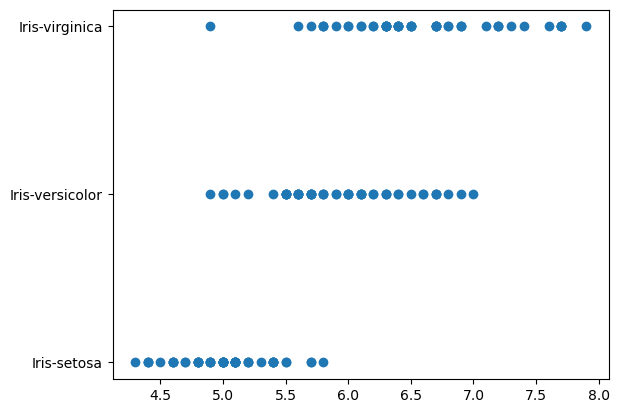

In [10]:
fig, ax = plt.subplots()
ax.scatter(df["sepal_length"],df["species"]);

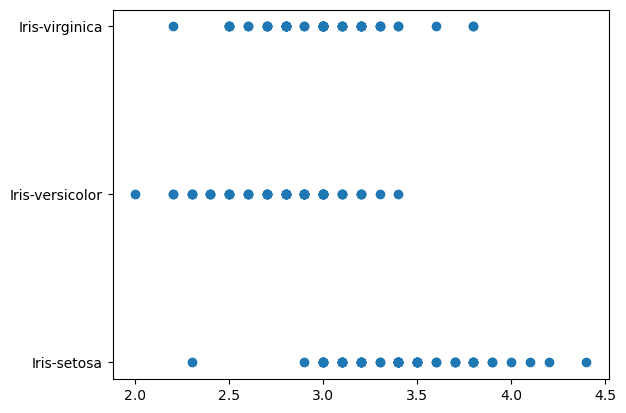

In [11]:
fig, ax = plt.subplots()
ax.scatter(df["sepal_width"],df["species"]);

### Species according to length and width of the petal

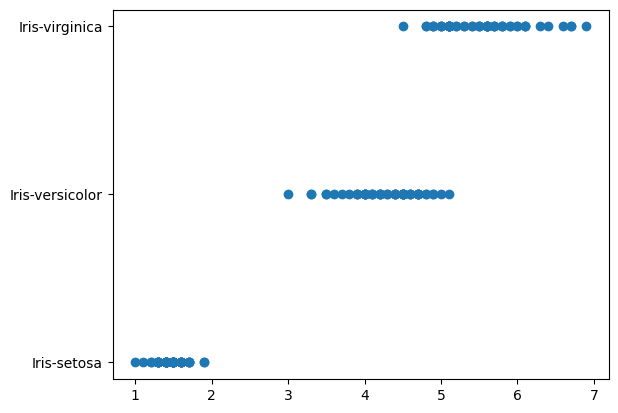

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["petal_length"],df["species"]);

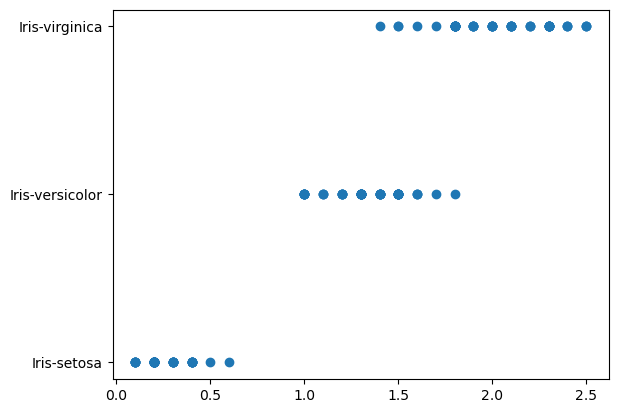

In [13]:
fig, ax = plt.subplots()
ax.scatter(df["petal_width"],df["species"]);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
pd.api.types.is_string_dtype(df["species"])

True

In [17]:
# This will turn all of the string value into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


### Filling and turning categorical variables into numbers

In [19]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

species


In [20]:
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes+1

In [21]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species,species_is_missing
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561,NaN
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446,NaN
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043,NaN
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464,NaN
species,0.782561,-0.419446,0.949043,0.956464,1.000000,NaN
species_is_missing,NaN,NaN,NaN,NaN,NaN,NaN


(6.5, -0.5)

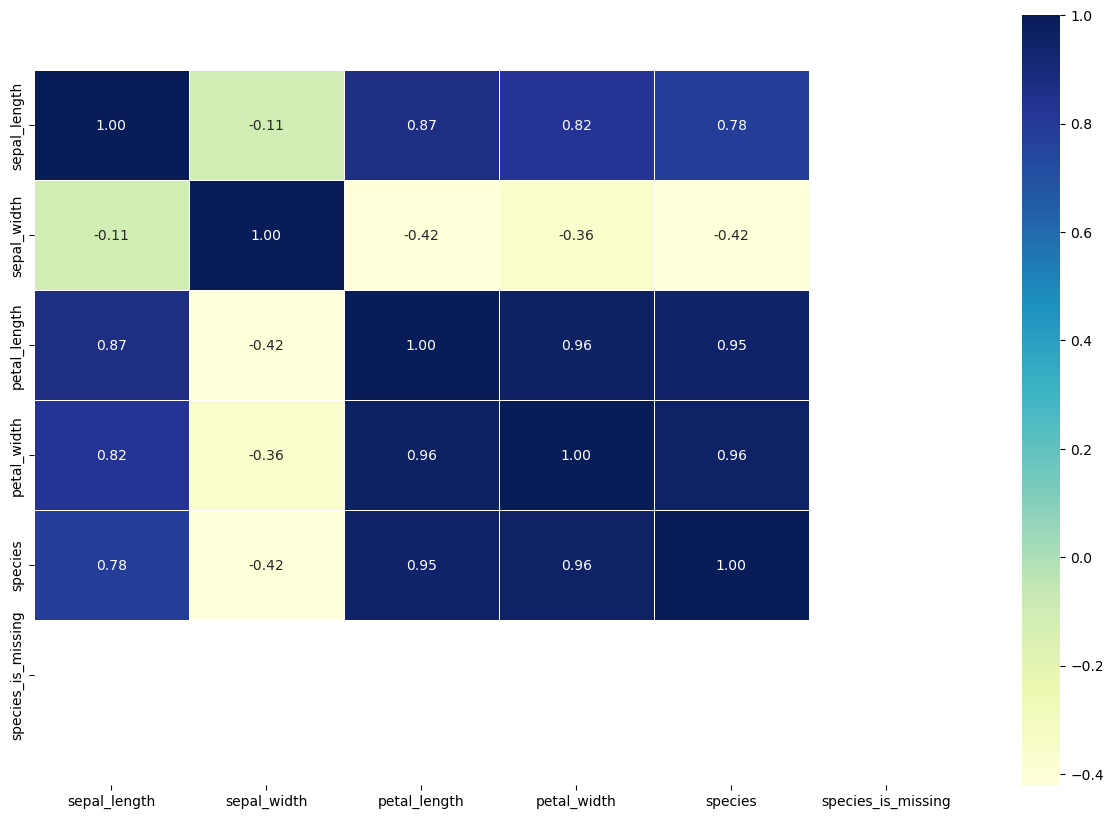

In [22]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 4. Modelling 

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_is_missing
0,5.1,3.5,1.4,0.2,1,False
1,4.9,3.0,1.4,0.2,1,False
2,4.7,3.2,1.3,0.2,1,False
3,4.6,3.1,1.5,0.2,1,False
4,5.0,3.6,1.4,0.2,1,False


In [24]:
# Split data into X and y
X = df.drop("species", axis=1)

y = df["species"]

In [25]:
X

,sepal_length,sepal_width,petal_length,petal_width,species_is_missing
0,5.1,3.5,1.4,0.2,False
1,4.9,3.0,1.4,0.2,False
2,4.7,3.2,1.3,0.2,False
3,4.6,3.1,1.5,0.2,False
4,5.0,3.6,1.4,0.2,False
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False
146,6.3,2.5,5.0,1.9,False
147,6.5,3.0,5.2,2.0,False
148,6.2,3.4,5.4,2.3,False


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int8

In [27]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [28]:
X_train

,sepal_length,sepal_width,petal_length,petal_width,species_is_missing
22,4.6,3.6,1.0,0.2,False
15,5.7,4.4,1.5,0.4,False
65,6.7,3.1,4.4,1.4,False
11,4.8,3.4,1.6,0.2,False
42,4.4,3.2,1.3,0.2,False
...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,False
106,4.9,2.5,4.5,1.7,False
14,5.8,4.0,1.2,0.2,False
92,5.8,2.6,4.0,1.2,False


In [29]:
y_train

22     1
15     1
65     2
11     1
42     1
      ..
71     2
106    3
14     1
92     2
102    3
Name: species, Length: 120, dtype: int8

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [30]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 1.0, 'KNN': 1.0, 'Random Forest': 1.0}

### Model Comparison

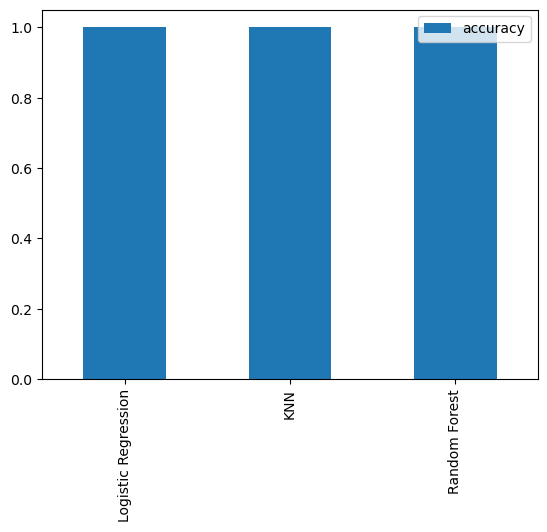

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [33]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [34]:
train_scores

[1.0,
 0.9666666666666667,
 0.95,
 0.9583333333333334,
 0.9666666666666667,
 0.9666666666666667,
 0.975,
 0.9583333333333334,
 0.9666666666666667,
 0.9833333333333333,
 0.9583333333333334,
 0.975,
 0.9666666666666667,
 0.975,
 0.975,
 0.975,
 0.9666666666666667,
 0.9666666666666667,
 0.9583333333333334,
 0.9666666666666667]

In [35]:
test_scores

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Maximum KNN score on the test data: 100.00%


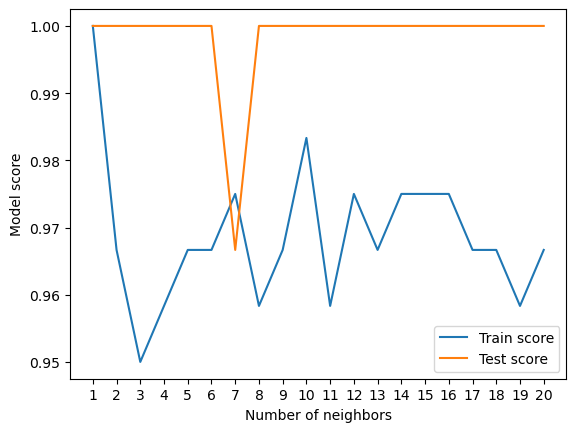

In [36]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [37]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [38]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [40]:
rs_log_reg.score(X_test, y_test)

1.0

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [41]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

1.0

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and check them again using GridSearchCV...

In [44]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [45]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 221.22162910704503, 'solver': 'liblinear'}

In [46]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

1.0

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [47]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [48]:
y_preds

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1], dtype=int8)

In [49]:
y_test

73     2
18     1
118    3
78     2
76     2
31     1
64     2
141    3
68     2
82     2
110    3
12     1
36     1
9      1
19     1
56     2
104    3
69     2
55     2
132    3
29     1
127    3
26     1
128    3
131    3
145    3
108    3
143    3
45     1
30     1
Name: species, dtype: int8

In [50]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


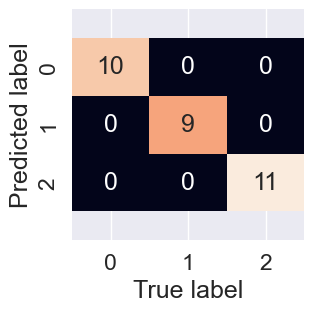

In [51]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Now we've got a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [53]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 221.22162910704503, 'solver': 'liblinear'}

In [54]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=221.22162910704503,
                         solver="liblinear")

In [55]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([1.        , 1.        , 0.96666667, 0.93333333, 1.        ])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9800000000000001

In [57]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision_macro")
cv_precision=np.mean(cv_precision)
cv_precision

0.9806060606060605

In [58]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall_macro")
cv_recall = np.mean(cv_recall)
cv_recall

0.9800000000000001

In [59]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1_macro")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9799832915622388

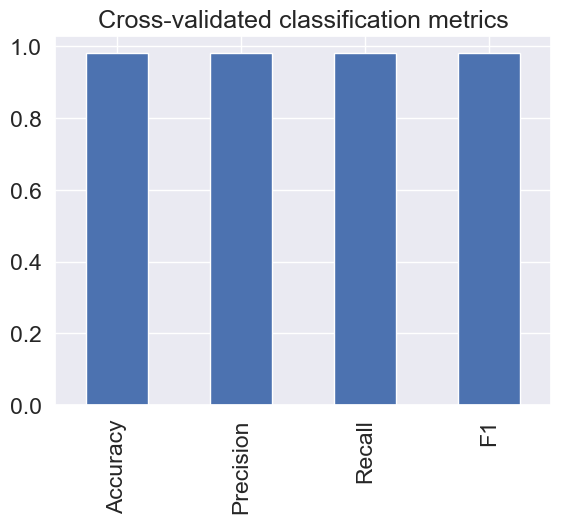

In [60]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

In [61]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=221.22162910704503,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [62]:
# Check coef_
clf.coef_

array([[ 0.97519804,  3.42388124, -5.34251978, -2.53139623,  0.        ],
       [ 0.06330906, -2.84980237,  0.9831196 , -2.2599307 ,  0.        ],
       [-2.53268109, -5.65328033,  5.97728762, 10.26839946,  0.        ]])

In [63]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_is_missing
0,5.1,3.5,1.4,0.2,1,False
1,4.9,3.0,1.4,0.2,1,False
2,4.7,3.2,1.3,0.2,1,False
3,4.6,3.1,1.5,0.2,1,False
4,5.0,3.6,1.4,0.2,1,False


In [64]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'sepal_length': 0.9751980440757623,
 'sepal_width': 3.423881244861847,
 'petal_length': -5.342519779835578,
 'petal_width': -2.531396230039521,
 'species': 0.0}

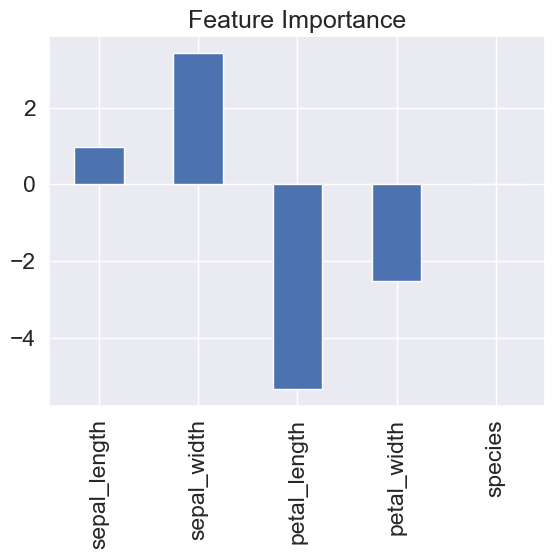

In [65]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [66]:
pd.crosstab(df["sepal_width"], df["species"])

species,1,2,3
sepal_width,,,
2.0,0,1,0
2.2,0,2,1
2.3,1,3,0
2.4,0,3,0
2.5,0,4,4
2.6,0,3,2
2.7,0,5,4
2.8,0,6,8
2.9,1,7,2


## 5. Saving and loading trained machine learning models

With Python's `pickle` module

**Pickle**

In [67]:
import pickle

# Save an extisting model to file
pickle.dump(clf, open("ifc_logistic_regression_model_1.pkl", "wb"))

In [68]:
# Load a saved model
loaded_pickle_model = pickle.load(open("ifc_logistic_regression_model_1.pkl", "rb"))

In [69]:
loaded_pickle_model.score(X_test,y_test)

1.0

In [70]:
score = loaded_pickle_model.score(X_test,y_test)
print(f"Model Score: {score}")

Model Score: 1.0
